In [1]:
import ccxt
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exchange = ccxt.binance()

In [3]:
symbol = 'ETH/USDT'
timeframe = '1h'
limit = 1000

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)

In [4]:
colonnes = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
df_eth = pd.DataFrame(ohlcv, columns=colonnes)

In [5]:
df_eth

,Timestamp,Open,High,Low,Close,Volume
0,1759118400000,4121.80,4123.99,4113.75,4119.26,5308.9678
1,1759122000000,4119.26,4120.61,4103.80,4114.13,7534.8319
2,1759125600000,4114.12,4114.80,4094.92,4097.53,11044.2760
3,1759129200000,4097.53,4113.08,4088.15,4108.25,13214.2379
4,1759132800000,4108.26,4135.88,4108.06,4122.30,12464.1753
...,...,...,...,...,...,...
995,1762700400000,3507.01,3537.53,3506.00,3515.51,26385.7403
996,1762704000000,3515.52,3537.32,3501.63,3528.19,21553.4500
997,1762707600000,3528.19,3531.65,3504.00,3515.51,9440.8726
998,1762711200000,3515.52,3544.62,3510.94,3541.54,12230.0930


In [6]:
type(df_eth)

pandas.core.frame.DataFrame

In [7]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1000 non-null   int64  
 1   Open       1000 non-null   float64
 2   High       1000 non-null   float64
 3   Low        1000 non-null   float64
 4   Close      1000 non-null   float64
 5   Volume     1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [8]:
df_eth['Timestamp'] = pd.to_datetime(df_eth['Timestamp'], unit='ms')
df_eth = df_eth.set_index('Timestamp')

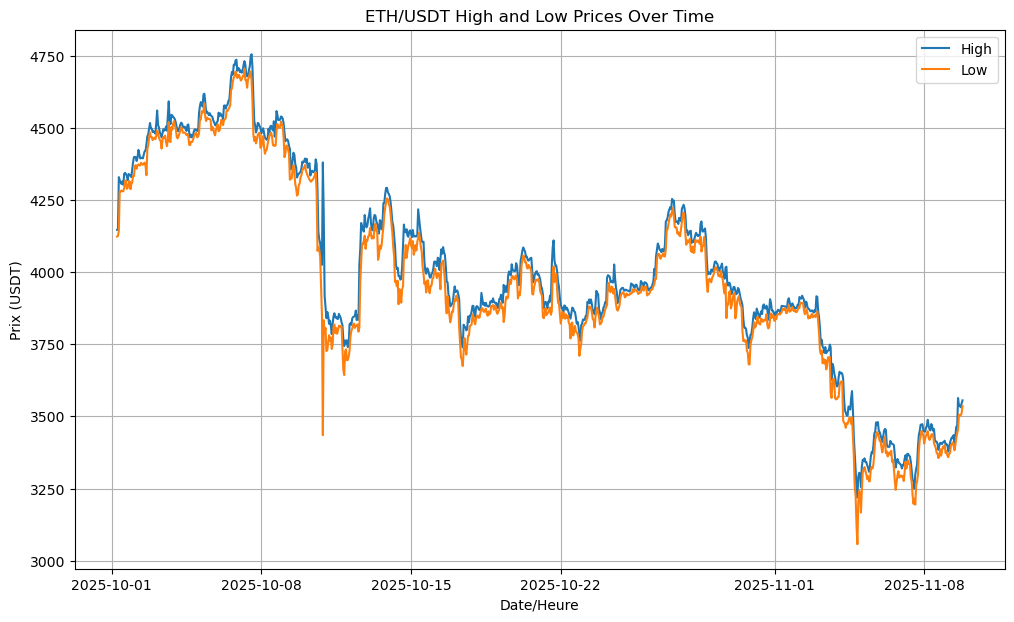

In [31]:
plt.figure(figsize=(12,7))
plt.plot(df_eth.index, df_eth['High'], label='High')
plt.plot(df_eth.index, df_eth['Low'], label='Low')
plt.title('ETH/USDT High and Low Prices Over Time')
plt.xlabel("Date/Heure")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df_eth['MA_50h'] = df_eth['Close'].rolling(window=50).mean()

In [11]:
df_eth.dropna(inplace=True)

In [12]:
df_eth

,Open,High,Low,Close,Volume,MA_50h
Timestamp,,,,,,
2025-10-01 05:00:00,4140.38,4156.79,4140.06,4143.86,7324.7064,4156.7834
2025-10-01 06:00:00,4143.86,4146.54,4123.08,4126.26,13184.5623,4156.9234
2025-10-01 07:00:00,4126.27,4147.55,4125.00,4145.80,10744.1141,4157.5568
2025-10-01 08:00:00,4145.80,4329.00,4142.92,4291.23,106021.5206,4161.4308
2025-10-01 09:00:00,4291.24,4318.11,4280.06,4310.89,41593.3073,4165.4836
...,...,...,...,...,...,...
2025-11-09 15:00:00,3507.01,3537.53,3506.00,3515.51,26385.7403,3414.6326
2025-11-09 16:00:00,3515.52,3537.32,3501.63,3528.19,21553.4500,3419.4078
2025-11-09 17:00:00,3528.19,3531.65,3504.00,3515.51,9440.8726,3423.7676


In [13]:
df_eth['Signal']= np.where(df_eth['Close'] > df_eth['MA_50h'], 1, 0)

In [14]:
df_eth['Trade'] = df_eth['Signal'].diff()

In [15]:
df_eth

,Open,High,Low,Close,Volume,MA_50h,Signal,Trade
Timestamp,,,,,,,,
2025-10-01 05:00:00,4140.38,4156.79,4140.06,4143.86,7324.7064,4156.7834,0,NaN
2025-10-01 06:00:00,4143.86,4146.54,4123.08,4126.26,13184.5623,4156.9234,0,0.0
2025-10-01 07:00:00,4126.27,4147.55,4125.00,4145.80,10744.1141,4157.5568,0,0.0
2025-10-01 08:00:00,4145.80,4329.00,4142.92,4291.23,106021.5206,4161.4308,1,1.0
2025-10-01 09:00:00,4291.24,4318.11,4280.06,4310.89,41593.3073,4165.4836,1,0.0
...,...,...,...,...,...,...,...,...
2025-11-09 15:00:00,3507.01,3537.53,3506.00,3515.51,26385.7403,3414.6326,1,0.0
2025-11-09 16:00:00,3515.52,3537.32,3501.63,3528.19,21553.4500,3419.4078,1,0.0
2025-11-09 17:00:00,3528.19,3531.65,3504.00,3515.51,9440.8726,3423.7676,1,0.0


In [16]:
df_eth['Returns']=df_eth['Close'].pct_change()

In [17]:
df_eth['Strategy_Returns'] = df_eth['Returns'] * df_eth['Signal']

In [18]:
df_eth['Cumulative_Strategy_Returns'] = (df_eth['Strategy_Returns'] + 1).cumprod()
df_eth['Cumulative_Asset_Returns'] = (df_eth['Returns'] + 1).cumprod()

In [19]:
df_eth['Returns'].isna().sum()

1

In [20]:
df_eth.dropna(inplace=True)

In [21]:
df_eth

,Open,High,Low,Close,Volume,MA_50h,Signal,Trade,Returns,Strategy_Returns,Cumulative_Strategy_Returns,Cumulative_Asset_Returns
Timestamp,,,,,,,,,,,,
2025-10-01 06:00:00,4143.86,4146.54,4123.08,4126.26,13184.5623,4156.9234,0,0.0,-0.004247,-0.000000,1.000000,0.995753
2025-10-01 07:00:00,4126.27,4147.55,4125.00,4145.80,10744.1141,4157.5568,0,0.0,0.004736,0.000000,1.000000,1.000468
2025-10-01 08:00:00,4145.80,4329.00,4142.92,4291.23,106021.5206,4161.4308,1,1.0,0.035079,0.035079,1.035079,1.035563
2025-10-01 09:00:00,4291.24,4318.11,4280.06,4310.89,41593.3073,4165.4836,1,0.0,0.004581,0.004581,1.039821,1.040308
2025-10-01 10:00:00,4310.89,4312.65,4278.58,4282.62,16100.4439,4168.6900,1,0.0,-0.006558,-0.006558,1.033002,1.033486
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-09 15:00:00,3507.01,3537.53,3506.00,3515.51,26385.7403,3414.6326,1,0.0,0.002421,0.002421,1.702783,0.848366
2025-11-09 16:00:00,3515.52,3537.32,3501.63,3528.19,21553.4500,3419.4078,1,0.0,0.003607,0.003607,1.708925,0.851426
2025-11-09 17:00:00,3528.19,3531.65,3504.00,3515.51,9440.8726,3423.7676,1,0.0,-0.003594,-0.003594,1.702783,0.848366


<Figure size 1200x600 with 0 Axes>

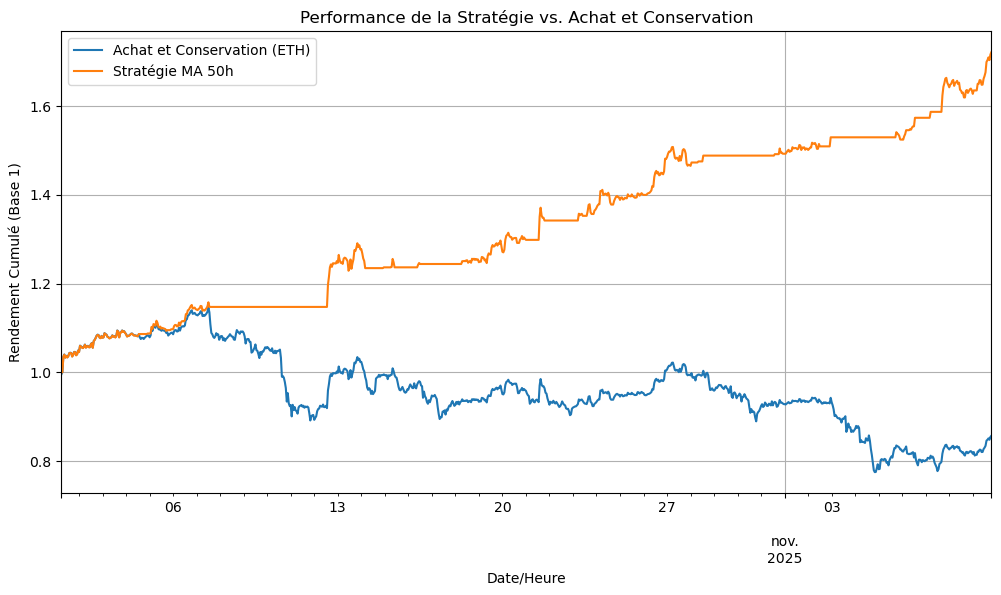

In [30]:
plt.figure(figsize=(12, 6))
df_eth[['Cumulative_Asset_Returns', 'Cumulative_Strategy_Returns']].plot(
    title='Performance de la Stratégie vs. Achat et Conservation',
    figsize=(12, 6) 
)
plt.ylabel("Rendement Cumulé (Base 1)")
plt.xlabel("Date/Heure")
plt.legend(["Achat et Conservation (ETH)", "Stratégie MA 50h"])
plt.grid(True)
plt.show()

In [23]:
volatilite_horaire = df_eth['Strategy_Returns'].std()

print(f"La volatilité est de : {volatilite_horaire:.6f}")

La volatilité est de : 0.004445


In [24]:
volatilite_horaire = df_eth['Strategy_Returns'].std()
facteur_annualisation = np.sqrt(8760)
volatilite_annualisee = volatilite_horaire * facteur_annualisation

print(f"Volatilité Annuelle Estimée de la Stratégie : {volatilite_annualisee * 100:.2f} %")

Volatilité Annuelle Estimée de la Stratégie : 41.60 %


In [25]:
rendement_cumule_final = df_eth['Cumulative_Strategy_Returns'].iloc[-1]
nombre_total_heures = len(df_eth)

In [29]:
print(f"Rendement Cumulé Final (C) : {rendement_cumule_final:.4f}")
print(f"Nombre Total d'Heures : {nombre_total_heures}")

Rendement Cumulé Final (C) : 1.7208
Nombre Total d'Heures : 950


In [28]:
df_eth['Peak'] = df_eth['Cumulative_Strategy_Returns'].cummax()

df_eth['Drawdown'] = 1 - df_eth['Cumulative_Strategy_Returns'] / df_eth['Peak']
maximum_drawdown = df_eth['Drawdown'].max()

print(f"Maximum Drawdown (MDD) : {maximum_drawdown * 100:.2f} %")

Maximum Drawdown (MDD) : 4.34 %
